In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score


dataset = pd.read_csv ('weather_train.csv')
print (dataset.head())

   Unnamed: 0        Date       Location  MinTemp  MaxTemp  Rainfall  \
0      110363  2014-01-25         Albany     18.4     26.8       0.2   
1       22316  2012-05-12  NorfolkIsland     16.1     22.1       2.4   
2       75456  2010-04-22       Portland     11.6     26.4       0.2   
3       81222  2009-08-13       Dartmoor      6.8     16.5       0.8   
4        1753  2013-12-17         Albury     16.9     34.0       0.0   

   Evaporation  Sunshine WindGustDir  WindGustSpeed  ... Humidity9am  \
0          4.8       8.5         NaN            NaN  ...        59.0   
1          4.2       8.7           S           31.0  ...        70.0   
2          2.2      10.4           W           37.0  ...        72.0   
3          1.4       6.7          NW           37.0  ...        99.0   
4          NaN       NaN           N           30.0  ...        54.0   

  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0        72.0       1014.9       1009.2       0.0    

Choosing columns below that are relevent for this model

In [2]:
dataset = dataset[['MinTemp', 'MaxTemp', 'Evaporation',
        'Sunshine', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainTomorrow']].reset_index(drop=True)

In [3]:
dataset = dataset.dropna()
dataset.apply(lambda column: sum(column.isnull()))
dataset = dataset.reset_index()
del dataset['index']
dataset.head()


,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,16.1,22.1,4.2,8.7,31.0,13.0,13.0,70.0,70.0,1020.2,1018.2,2.0,3.0,19.9,20.3,No
1,11.6,26.4,2.2,10.4,37.0,19.0,17.0,72.0,59.0,1018.4,1015.5,2.0,6.0,19.7,24.0,Yes
2,12.9,21.5,6.0,10.9,56.0,17.0,33.0,60.0,32.0,1013.8,1012.8,6.0,4.0,13.4,18.9,No
3,26.6,34.5,6.8,5.7,56.0,9.0,24.0,60.0,57.0,1008.7,1004.7,7.0,7.0,31.5,32.8,Yes
4,11.4,21.0,3.4,3.4,43.0,28.0,17.0,55.0,41.0,1013.9,1012.7,7.0,7.0,13.9,19.8,No


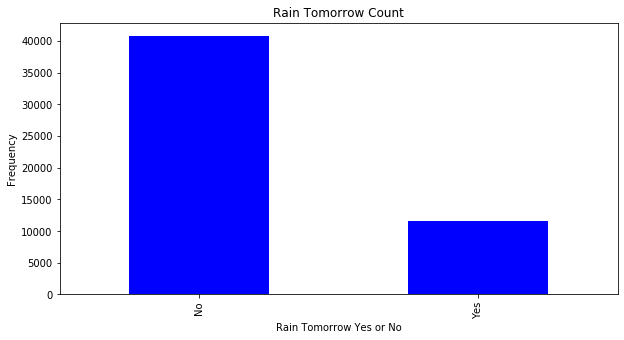

In [4]:

bx = dataset['RainTomorrow'].value_counts().plot(kind='bar',
                                    figsize=(10,5),
                                    title="Rain Tomorrow Count", color='blue')
bx.set_xlabel("Rain Tomorrow Yes or No")
bx.set_ylabel("Frequency")
plt.show()

Graph below seems to be left skewed

Text(0, 0.5, 'Count')

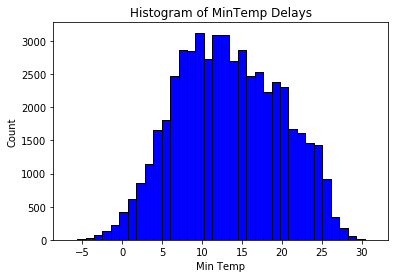

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
plt.hist(dataset['MinTemp'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# seaborn histogram
sns.distplot(dataset['MinTemp'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of MinTemp Delays')
plt.xlabel('Min Temp')
plt.ylabel('Count')

Graph below seems to be left skewed

Text(0, 0.5, 'Count')

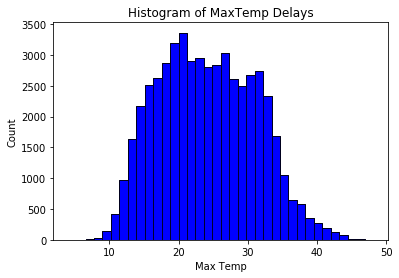

In [6]:
# matplotlib histogram
plt.hist(dataset['MaxTemp'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# seaborn histogram
sns.distplot(dataset['MaxTemp'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of MaxTemp Delays')
plt.xlabel('Max Temp')
plt.ylabel('Count')

Graph below is right skewed

Text(0, 0.5, 'Count')

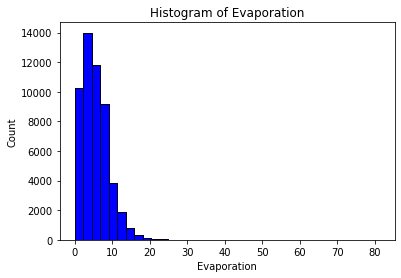

In [7]:

plt.hist(dataset['Evaporation'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# seaborn histogram
sns.distplot(dataset['Evaporation'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Evaporation')
plt.xlabel('Evaporation')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

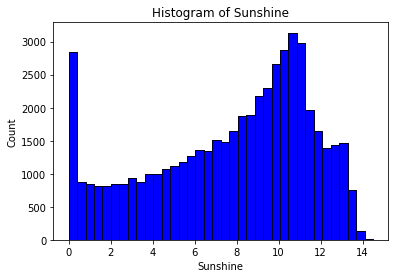

In [8]:
plt.hist(dataset['Sunshine'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# seaborn histogram
sns.distplot(dataset['Sunshine'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Sunshine')
plt.xlabel('Sunshine')
plt.ylabel('Count')



I used labelencorder to make No as 0 and Yes as 1. The ML model dosn't take string as inputs

In [10]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

dataset['RainTomorrow'] = labelencoder.fit_transform(dataset['RainTomorrow'].astype(str))
dataset

,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,16.1,22.1,4.2,8.7,31.0,13.0,13.0,70.0,70.0,1020.2,1018.2,2.0,3.0,19.9,20.3,0
1,11.6,26.4,2.2,10.4,37.0,19.0,17.0,72.0,59.0,1018.4,1015.5,2.0,6.0,19.7,24.0,1
2,12.9,21.5,6.0,10.9,56.0,17.0,33.0,60.0,32.0,1013.8,1012.8,6.0,4.0,13.4,18.9,0
3,26.6,34.5,6.8,5.7,56.0,9.0,24.0,60.0,57.0,1008.7,1004.7,7.0,7.0,31.5,32.8,1
4,11.4,21.0,3.4,3.4,43.0,28.0,17.0,55.0,41.0,1013.9,1012.7,7.0,7.0,13.9,19.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52343,16.4,31.1,5.2,10.9,30.0,9.0,15.0,65.0,50.0,1012.2,1008.8,1.0,6.0,25.7,29.3,0
52344,11.8,32.5,4.8,10.9,35.0,7.0,9.0,99.0,27.0,1022.9,1018.3,1.0,1.0,16.0,31.7,0
52345,16.7,22.7,15.2,0.5,46.0,15.0,6.0,67.0,99.0,1008.7,1007.3,7.0,8.0,21.7,19.3,1
52346,15.7,32.3,8.0,11.3,37.0,9.0,13.0,55.0,23.0,1023.1,1020.3,1.0,2.0,21.0,31.0,0


In [11]:
x=dataset.iloc[:, : 15]
y=dataset['RainTomorrow']

In [12]:
import seaborn as sn
import matplotlib.pyplot as plt


On average below heat map shows high negative or positive coorelation between most of the variables. Hence I have decided to add all the variables in the ML model. 

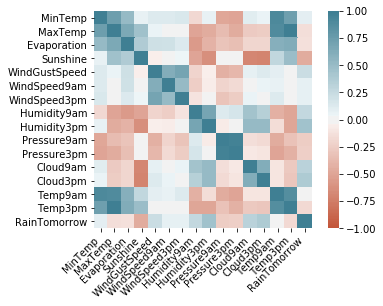

In [13]:
corr = dataset.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### Machine Learning Models
I have used three models to see which one of them works best for prediction. <br>
(1) Logistic Regression <br>
(2) KNN <br>
(3) Random Forest <br>
I have choosed this algorithims because of the fact that this is a labelled dataset. As Rain Tommorow coloumn either tells 'Yes' Or 'No' if it is going to rain or not. For these type of dataset above three models work the best.


In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Divided into test and train dataset

In [15]:
x_train, x_test, y_train, y_test =\
    train_test_split(x, y, test_size=0.2, random_state=0) 

In [16]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)


In [17]:
model=LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
model.fit(x_train,y_train)

LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [18]:
x_test = scaler.transform(x_test)
y_pred = model.predict(x_test)


In [19]:
model.score(x_train, y_train)

0.8524046038492765

In [20]:
model.score(x_test, y_test)

0.8576886341929322

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[7757  455]
 [1035 1223]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      8212
           1       0.73      0.54      0.62      2258

    accuracy                           0.86     10470
   macro avg       0.81      0.74      0.77     10470
weighted avg       0.85      0.86      0.85     10470



Accuracy score alone is not a good indicator to see if the model is best. Precesion=True Positive/(True Positive+False Positive) <br>
Recall= True Positive/(True Positive+False Negative). <br>
F1_score=(2*precision*recall)/(precision+recall) <br>
Above high lights for 0 'NO' the percision and recall values are high for 'YES' the percision and recall values are lesser. 


In [22]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [23]:
y_pred = classifier.predict(x_test)


In [24]:
classifier.score(x_train, y_train)


0.8873155356034195

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[7641  571]
 [1047 1211]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      8212
           1       0.68      0.54      0.60      2258

    accuracy                           0.85     10470
   macro avg       0.78      0.73      0.75     10470
weighted avg       0.84      0.85      0.84     10470



Similar to logistic regression above high lights for 0 'NO' the percision and recall values are high for 'YES' the percision and recall values are lesser.

In [26]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

model.fit(x_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
y_pr = model.predict(x_test)



In [29]:
model.score(x_train, y_train)

0.8359520511963322

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pr))
print(classification_report(y_test, y_pr))

[[8070  142]
 [1524  734]]
              precision    recall  f1-score   support

           0       0.84      0.98      0.91      8212
           1       0.84      0.33      0.47      2258

    accuracy                           0.84     10470
   macro avg       0.84      0.65      0.69     10470
weighted avg       0.84      0.84      0.81     10470



Similar to logistic regression and KNN above high lights for 0 'NO' the percision and recall values are high for 'YES' the percision and recall values are lesser.

### Conclusion <br>
Even though the KNN model has the highest accuracy but the accuracy score depends upon total true positive and true negative values which might not tells us the best model. How ever seeing percesion and recall score of all the model for 0 which is NO, we can see the higher values all together. The problem lied with 'YES' since the number of data presented for 'YES' was lower hence the precesion and recall score would have been lower all togther. We can see best average for logistic regression when it comes for recall and percesion values. In all of 3 logisitic regression holds the slight advantage over KNN and Random forest. Also the f1 scores are best for logistic regression. The results of KNN and logisitic regression are very close. A better decesion between all of the models can be made if more data for 'YES' is added. Only then a better conclusion can be made. But for now logistic regression holds a slighter advantage.
